In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [5]:
file_path = "D:/Fraud Detection Data/users_data.csv"

In [7]:
users_df =  pd.read_csv(file_path)

In [8]:
users_df 

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,$25336,$54654,$27241,618,1


In [11]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [13]:
users_df.isnull().sum()
users_df.duplicated().sum()

0

In [15]:
#Converting Objects into float
money_cols = [ 'per_capita_income' , 'yearly_income' , 'total_debt']

for cols in money_cols:
    users_df[cols] = users_df[cols].replace ('[\$,]', ' ', regex=True).astype(float)

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\prama\AppData\Local\Temp\ipykernel_8752\2936391249.py:5: SyntaxWarning: invalid escape sequence '\$'
  users_df[cols] = users_df[cols].replace ('[\$,]', ' ', regex=True).astype(float)


In [17]:
users_df[money_cols].head()

,per_capita_income,yearly_income,total_debt
0,29278.0,59696.0,127613.0
1,37891.0,77254.0,191349.0
2,22681.0,33483.0,196.0
3,163145.0,249925.0,202328.0
4,53797.0,109687.0,183855.0


In [19]:
users_df.describe()

,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,23141.928000,45715.882000,63709.694000,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,11324.137358,22992.615456,52254.453421,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,0.000000,1.000000,0.000000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,16824.500000,32818.500000,23986.750000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,20581.000000,40744.500000,58251.000000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,26286.000000,52698.500000,89070.500000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,163145.000000,307018.000000,516263.000000,850.000000,9.000000


In [21]:
#Checking for cuurent_age > retirement-age
users_df[users_df['current_age'] > users_df['retirement_age']]

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5
8,1116,81,66,1938,7,Female,11 Spruce Avenue,40.32,-75.32,26273.0,42509.0,2895.0,755,5
17,153,76,71,1943,8,Female,172 Birch Street,35.29,-111.32,21950.0,27484.0,16803.0,660,4
22,1946,76,66,1943,6,Male,9186 Washington Avenue,41.47,-81.67,19524.0,41109.0,21486.0,698,2
23,1674,70,64,1949,4,Male,5073 Wessex Avenue,35.49,-90.35,14172.0,26858.0,11245.0,712,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,7,74,61,1945,5,Male,124 Madison Lane,39.30,-76.61,20919.0,32682.0,21379.0,650,3
1983,1528,78,73,1942,1,Female,324 Lafayette Drive,32.61,-93.28,17311.0,27992.0,1058.0,695,6
1986,97,69,60,1950,3,Female,93 Mill Drive,35.97,-83.94,19596.0,32952.0,5077.0,765,1
1993,391,85,66,1934,7,Female,31 Hill Boulevard,33.69,-78.89,19025.0,35270.0,1769.0,731,6


In [23]:
#Adding flag column for the current_age > retirement_age and use it in analysis 
users_df ['Age_Retirement_Issue'] = users_df['current_age'] > users_df['retirement_age']


In [25]:
users_df['Age_Retirement_Issue'].value_counts()

Age_Retirement_Issue
False    1723
True      277
Name: count, dtype: int64

In [27]:
users_df[['current_age', 'retirement_age', 'Age_Retirement_Issue']].head()

,current_age,retirement_age,Age_Retirement_Issue
0,53,66,False
1,53,68,False
2,81,67,True
3,63,63,False
4,43,70,False


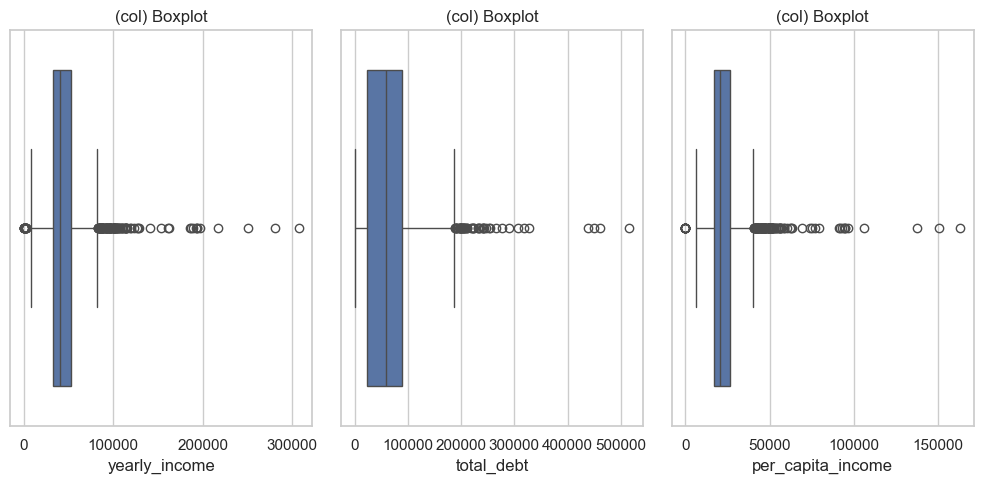

In [29]:
#Plotting a boxplot to check for outliers
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize = (10,5))
for i,col in enumerate(['yearly_income','total_debt', 'per_capita_income']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=users_df[col])
    plt.title(f'(col) Boxplot')
plt.tight_layout()
plt.show()

In [31]:
def add_outlier_flag(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)
users_df['income_outlier'] = add_outlier_flag(users_df, 'yearly_income')
users_df['debt_outlier'] = add_outlier_flag(users_df, 'total_debt')
users_df['per_capita_outlier'] = add_outlier_flag(users_df, 'per_capita_income')
print(users_df[['income_outlier', 'debt_outlier', 'per_capita_outlier']].sum())
users_df[users_df['income_outlier'] == 1].head()

income_outlier        118
debt_outlier           51
per_capita_outlier    123
dtype: int64


,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,Age_Retirement_Issue,income_outlier,debt_outlier,per_capita_outlier
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145.0,249925.0,202328.0,722,4,False,1,1,1
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797.0,109687.0,183855.0,675,1,False,1,0,1
21,777,18,65,2002,1,Male,970 Essex Drive,37.37,-122.21,106305.0,216740.0,0.0,700,2,False,1,0,1
40,811,91,68,1929,2,Female,5492 Maple Drive,38.90,-94.68,51642.0,84694.0,2149.0,741,7,True,1,0,1
58,1452,46,59,1973,5,Female,524 Ocean Drive,29.76,-95.38,95039.0,193773.0,241571.0,660,1,False,1,1,1


In [33]:
#Cleaning card Dataset
cards_df = pd.read_csv("D:/Fraud Detection Data/cards_data.csv")
cards_df

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,2711,185,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1305,1007,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,743,1110,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No


In [35]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [37]:
#Cleaning cards_df
cards_df['credit_limit'] = cards_df['credit_limit'].replace (r'[\$,]','', regex=True).astype(float)
cards_df['acct_open_date'] = pd.to_datetime (cards_df['acct_open_date'],errors='coerce')
cards_df['expires'] = pd.to_datetime(cards_df['expires'], errors='coerce') 
cards_df['has_chip'] = cards_df['has_chip'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})
cards_df['card_on_dark_web'] = cards_df['card_on_dark_web'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

C:\Users\prama\AppData\Local\Temp\ipykernel_8752\149592459.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cards_df['acct_open_date'] = pd.to_datetime (cards_df['acct_open_date'],errors='coerce')
C:\Users\prama\AppData\Local\Temp\ipykernel_8752\149592459.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cards_df['expires'] = pd.to_datetime(cards_df['expires'], errors='coerce')


In [39]:
cards_df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,2022-12-01,623,1,2,24295.0,2002-09-01,2008,0
1,2731,825,Visa,Debit,4956965974959986,2020-12-01,393,1,2,21968.0,2014-04-01,2014,0
2,3701,825,Visa,Debit,4582313478255491,2024-02-01,719,1,2,46414.0,2003-07-01,2004,0
3,42,825,Visa,Credit,4879494103069057,2024-08-01,693,0,1,12400.0,2003-01-01,2012,0
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,75,1,1,28.0,2008-09-01,2009,0


In [41]:
#Checking for Card Age
current_date = pd.to_datetime('today')
cards_df['card_age_years'] = (current_date - cards_df['acct_open_date']).dt.days // 365
#Checking for expired cards
cards_df['card_expired'] = (cards_df['expires'] < current_date).astype(int)
cards_df

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,card_age_years,card_expired
0,4524,825,Visa,Debit,4344676511950444,2022-12-01,623,1,2,24295.0,2002-09-01,2008,0,22,1
1,2731,825,Visa,Debit,4956965974959986,2020-12-01,393,1,2,21968.0,2014-04-01,2014,0,11,1
2,3701,825,Visa,Debit,4582313478255491,2024-02-01,719,1,2,46414.0,2003-07-01,2004,0,21,1
3,42,825,Visa,Credit,4879494103069057,2024-08-01,693,0,1,12400.0,2003-01-01,2012,0,22,1
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,75,1,1,28.0,2008-09-01,2009,0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,5361,185,Amex,Credit,300609782832003,2024-01-01,663,1,1,6900.0,2000-11-01,2013,0,24,1
6142,2711,185,Visa,Credit,4718517475996018,2021-01-01,492,1,2,5700.0,2012-04-01,2012,0,13,1
6143,1305,1007,Mastercard,Credit,5929512204765914,2020-08-01,237,0,2,9200.0,2012-02-01,2012,0,13,1
6144,743,1110,Mastercard,Debit,5589768928167462,2020-01-01,630,1,1,28074.0,2020-01-01,2020,0,5,1


In [43]:
#Loading transactions_data
transactions_df = pd.read_csv("D:/Fraud Detection Data/transactions_data.csv")
transactions_df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [44]:
#Info of transaction_data
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [45]:
transactions_df['amount'] = transactions_df['amount'].replace ('[\$,]','',regex=True).astype(float)
transactions_df['zip'] = transactions_df['zip'].replace('',pd.NA)
transactions_df['zip'] = pd.to_numeric(transactions_df['zip'], errors = 'coerce')
transactions_df['zip'] = transactions_df['zip'].astype ('Int64')

transactions_df['date'] = pd.to_datetime(transactions_df['date'],errors = 'coerce')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\prama\AppData\Local\Temp\ipykernel_8752\4100384579.py:1: SyntaxWarning: invalid escape sequence '\$'
  transactions_df['amount'] = transactions_df['amount'].replace ('[\$,]','',regex=True).astype(float)


In [49]:
print(transactions_df['errors'].value_counts(dropna=False))

errors
NaN                                                    13094522
Insufficient Balance                                     130902
Bad PIN                                                   32119
Technical Glitch                                          26271
Bad Card Number                                            7767
Bad Expiration                                             6161
Bad CVV                                                    6106
Bad Zipcode                                                1126
Bad PIN,Insufficient Balance                                293
Insufficient Balance,Technical Glitch                       243
Bad Card Number,Insufficient Balance                         71
Bad PIN,Technical Glitch                                     70
Bad CVV,Insufficient Balance                                 57
Bad Expiration,Insufficient Balance                          47
Bad Card Number,Bad CVV                                      38
Bad Card Number,Bad Expiration   

In [51]:
#Creating flag column for errors table so that it can be usefull in modelling
error_types = [
    "Insufficient Balance",
    "Bad PIN",
    "Technical Glitch",                                          
    "Bad Card Number",                                           
    "Bad Expiration",                                             
    "Bad CVV",
    "Bad Zipcode"
]
#This for NaN values
transactions_df['errors']=transactions_df['errors'].fillna('')

for err in error_types:
    col_name = f"error_{err.lower().replace(' ', '_')}"
    transactions_df[col_name] = transactions_df['errors'].apply (lambda x: int (err in x))

In [52]:
transactions_df

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,error_insufficient_balance,error_bad_pin,error_technical_glitch,error_bad_card_number,error_bad_expiration,error_bad_cvv,error_bad_zipcode
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523,5499,,0,0,0,0,0,0,0
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722,5311,,0,0,0,0,0,0,0
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084,4829,,0,0,0,0,0,0,0
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307,4829,,0,0,0,0,0,0,0
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776,5813,,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792,5499,,0,0,0,0,0,0,0
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,NaN,<NA>,5815,,0,0,0,0,0,0,0
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002,4900,,0,0,0,0,0,0,0
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014,5411,,0,0,0,0,0,0,0


In [55]:
#Flagging negative amounts
transactions_df['negative_transaction'] = (transactions_df['amount'] < 0).astype(int)
#Normalizing has_chip column
transactions_df['use_chip'] = transactions_df['use_chip'].str.lower().str.strip()

transactions_df['transaction_type'] = transactions_df['use_chip'].map({
    'chip transaction': 'chip',
    'swipe transaction': 'swipe',
    'online transaction': 'online'
})

In [57]:
transactions_df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,errors,error_insufficient_balance,error_bad_pin,error_technical_glitch,error_bad_card_number,error_bad_expiration,error_bad_cvv,error_bad_zipcode,negative_transaction,transaction_type
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,swipe transaction,59935,Beulah,ND,58523,...,,0,0,0,0,0,0,0,1,swipe
1,7475328,2010-01-01 00:02:00,561,4575,14.57,swipe transaction,67570,Bettendorf,IA,52722,...,,0,0,0,0,0,0,0,0,swipe
2,7475329,2010-01-01 00:02:00,1129,102,80.00,swipe transaction,27092,Vista,CA,92084,...,,0,0,0,0,0,0,0,0,swipe
3,7475331,2010-01-01 00:05:00,430,2860,200.00,swipe transaction,27092,Crown Point,IN,46307,...,,0,0,0,0,0,0,0,0,swipe
4,7475332,2010-01-01 00:06:00,848,3915,46.41,swipe transaction,13051,Harwood,MD,20776,...,,0,0,0,0,0,0,0,0,swipe


In [59]:
fraud_labels = pd.read_json("D:/Fraud Detection Data/train_fraud_labels.json")

In [61]:
#Convert to dataframe
fraud_df = pd.DataFrame(list(fraud_labels["target"].items()), columns=["id", "is_fraud"])
# Clean and prepare
fraud_df["id"] = fraud_df["id"].astype(int)
fraud_df["is_fraud"] = fraud_df["is_fraud"].map({"Yes": 1, "No": 0})

# Preview
fraud_df


,id,is_fraud
0,10649266,0
1,23410063,0
2,9316588,0
3,12478022,0
4,9558530,0
...,...,...
8914958,14064699,0
8914959,7676538,0
8914960,15131030,0
8914961,17244732,0


In [63]:
# Load MCC codes using json
with open("D:/Fraud Detection Data/mcc_codes.json", "r") as f:
    mcc_mapping = json.load(f)

transactions_df['mcc'] = transactions_df['mcc'].astype(str)

transactions_df['mcc_description'] = transactions_df['mcc'].map(mcc_mapping)

list(mcc_mapping.items())[:5]

[('5812', 'Eating Places and Restaurants'),
 ('5541', 'Service Stations'),
 ('7996', 'Amusement Parks, Carnivals, Circuses'),
 ('5411', 'Grocery Stores, Supermarkets'),
 ('4784', 'Tolls and Bridge Fees')]

In [65]:
#Merging transactions_df and fraud_df
transactions_info = transactions_df.merge(fraud_df, on ='id', how = 'left')

In [67]:
#Mapping MCC codes to transactions_info

transactions_info['mcc'] = transactions_info['mcc'].astype(str)
transactions_info['mcc_description'] = transactions_info['mcc'].map(mcc_mapping)

In [69]:
#Merging cards_df into transactions_df
transactions_df = transactions_df.merge(cards_df, left_on='card_id', right_on='id', how='left', suffixes=('', '_card'))

In [71]:
#Merging users_df into transactions_info
transactions_info = transactions_info.merge(users_df, left_on='client_id', right_on='id', how='left', suffixes=('', '_user'))

In [73]:
transactions_info.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,Age_Retirement_Issue,income_outlier,debt_outlier,per_capita_outlier
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,swipe transaction,59935,Beulah,ND,58523,...,-100.76,23679.0,48277.0,110153.0,740,4,False,0,0,0
1,7475328,2010-01-01 00:02:00,561,4575,14.57,swipe transaction,67570,Bettendorf,IA,52722,...,-91.12,18076.0,36853.0,112139.0,834,5,False,0,0,0
2,7475329,2010-01-01 00:02:00,1129,102,80.00,swipe transaction,27092,Vista,CA,92084,...,-117.29,16894.0,34449.0,36540.0,686,3,False,0,0,0
3,7475331,2010-01-01 00:05:00,430,2860,200.00,swipe transaction,27092,Crown Point,IN,46307,...,-87.35,26168.0,53350.0,128676.0,685,5,False,0,0,0
4,7475332,2010-01-01 00:06:00,848,3915,46.41,swipe transaction,13051,Harwood,MD,20776,...,-76.60,33529.0,68362.0,96182.0,711,2,False,0,0,0


In [75]:
#Checking and Cleaning transactions_info
print("Total rows:", transactions_info.shape[0])

Total rows: 13305915


In [77]:
print("Rows with fraud label:", transactions_info['is_fraud'].notna().sum())
print("Rows without fraud label:", transactions_info['is_fraud'].isna().sum())

Rows with fraud label: 8914963
Rows without fraud label: 4390952


In [79]:
#Checking missing values
transactions_df.isna().sum().sort_values(ascending=False).head(40)

zip                           1652706
merchant_state                1563700
has_chip                            0
id_card                             0
client_id_card                      0
card_brand                          0
card_type                           0
card_number                         0
expires                             0
cvv                                 0
id                                  0
transaction_type                    0
num_cards_issued                    0
credit_limit                        0
acct_open_date                      0
year_pin_last_changed               0
card_on_dark_web                    0
card_age_years                      0
mcc_description                     0
error_bad_zipcode                   0
negative_transaction                0
mcc                                 0
client_id                           0
card_id                             0
amount                              0
use_chip                            0
merchant_id 

In [81]:
#Dropping rows without fraud_labels
model_df = transactions_info.dropna(subset=['is_fraud'])

In [83]:
print("Rows with fraud label:", model_df['is_fraud'].notna().sum())
print("Rows without fraud label:", model_df['is_fraud'].isna().sum())

Rows with fraud label: 8914963
Rows without fraud label: 0


In [85]:
#Dropping zip and merchant_state as it has too many nulls
model_df = model_df.drop(columns=['zip', 'merchant_state'])

In [87]:
#Debt to yearly income ratio
model_df['debt_to_income_ratio'] = model_df['total_debt']/model_df['yearly_income']

In [89]:
model_df = model_df.merge(cards_df[['id', 'credit_limit']], left_on='card_id', right_on='id', how='left')


In [91]:
#Credit card utilization
model_df['credit_utilization'] = model_df['amount']/model_df['credit_limit']

In [123]:
print(model_df.columns[model_df.columns.duplicated()])

Index(['id'], dtype='object')


In [125]:
model_df.rename(columns={'id': 'transaction_id'}, inplace=True)

In [127]:
model_df = model_df.merge(
    cards_df[['id', 'expires', 'acct_open_date']],
    left_on='card_id',
    right_on='id',
    how='left'
)

In [129]:
model_df.drop(columns=['id'], inplace=True)

In [133]:
model_df.rename(columns={'transaction_id': 'id'}, inplace=True)

In [135]:
print(model_df.columns[model_df.columns.duplicated()])

Index(['id'], dtype='object')


In [137]:
model_df.isna().sum().sort_values(ascending=False)

credit_utilization            119
id                              0
income_outlier                  0
address                         0
latitude                        0
longitude                       0
per_capita_income               0
yearly_income                   0
total_debt                      0
credit_score                    0
num_credit_cards                0
Age_Retirement_Issue            0
debt_outlier                    0
birth_month                     0
per_capita_outlier              0
debt_to_income_ratio            0
credit_limit                    0
id                              0
expires_x                       0
acct_open_date_x                0
expires_y                       0
acct_open_date_y                0
expires                         0
gender                          0
birth_year                      0
date                            0
retirement_age                  0
client_id                       0
card_id                         0
amount        

In [139]:
model_df.head()


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,mcc,errors,...,debt_to_income_ratio,credit_limit,credit_utilization,id,expires_x,acct_open_date_x,expires_y,acct_open_date_y,expires,acct_open_date
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,swipe transaction,59935,Beulah,5499,,...,2.281687,55.0,-1.400000,2972,2022-07-01,2008-05-01,2022-07-01,2008-05-01,2022-07-01,2008-05-01
1,7475328,2010-01-01 00:02:00,561,4575,14.57,swipe transaction,67570,Bettendorf,5311,,...,3.042873,9100.0,0.001601,4575,2024-12-01,2005-09-01,2024-12-01,2005-09-01,2024-12-01,2005-09-01
2,7475329,2010-01-01 00:02:00,1129,102,80.00,swipe transaction,27092,Vista,4829,,...,1.060698,14802.0,0.005405,102,2020-05-01,2006-01-01,2020-05-01,2006-01-01,2020-05-01,2006-01-01
3,7475332,2010-01-01 00:06:00,848,3915,46.41,swipe transaction,13051,Harwood,5813,,...,1.406951,19113.0,0.002428,3915,2020-01-01,2009-07-01,2020-01-01,2009-07-01,2020-01-01,2009-07-01
4,7475333,2010-01-01 00:07:00,1807,165,4.81,swipe transaction,20519,Bronx,5942,,...,1.894036,89.0,0.054045,165,2014-03-01,2008-01-01,2014-03-01,2008-01-01,2014-03-01,2008-01-01


In [141]:
print(len(model_df))

8914963


In [143]:
#Exploratory Data Analysis

#1.Ratio of fraud vs non-fraud

model_df['is_fraud'].value_counts()
model_df['is_fraud'].value_counts(normalize=True)


is_fraud
0.0    0.998505
1.0    0.001495
Name: proportion, dtype: float64

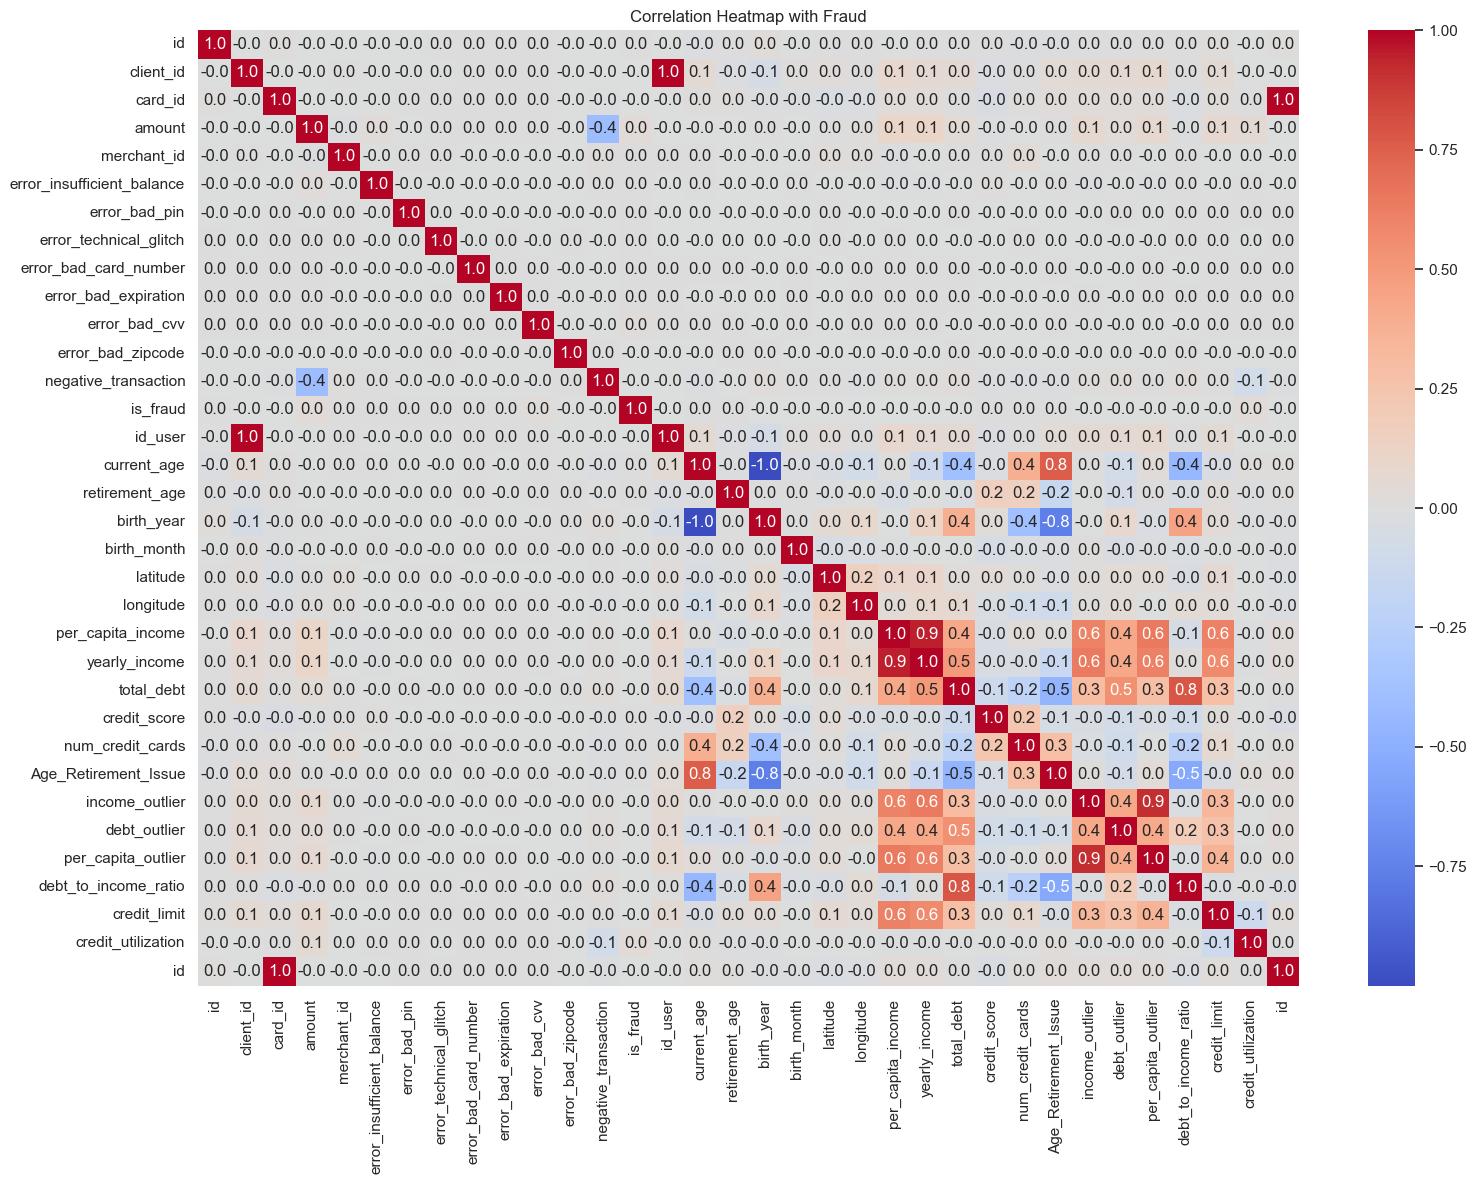

In [145]:
#2. Numeric correlation with fraud
corr = model_df.corr(numeric_only=True)
corr['is_fraud'].sort_values(ascending=False)
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Correlation Heatmap with Fraud")
plt.tight_layout()
plt.show()

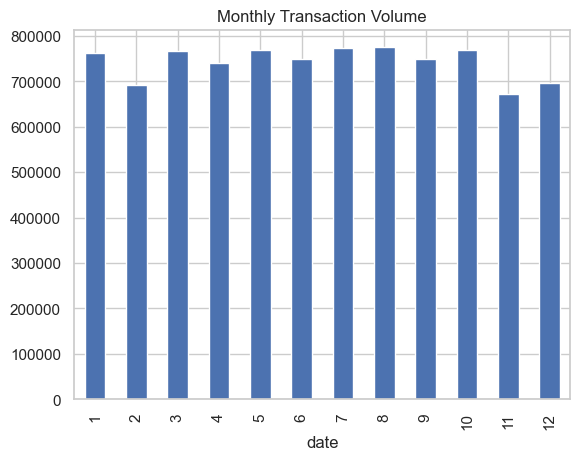

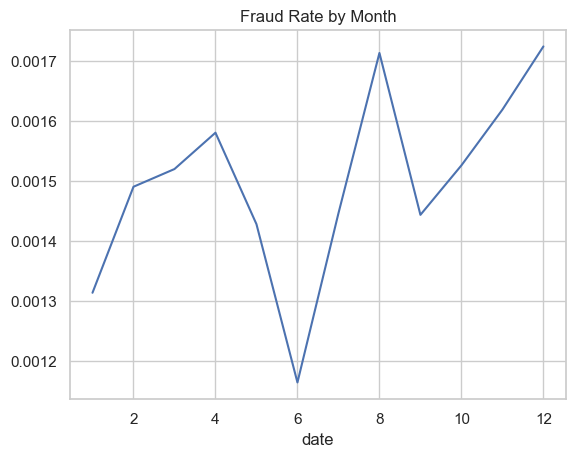

In [146]:
#3 Transactions over time
model_df['date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title("Monthly Transaction Volume")
plt.show()

#4 Fraud rate over time
model_df.groupby(model_df['date'].dt.month)['is_fraud'].mean().plot()
plt.title("Fraud Rate by Month")
plt.show()


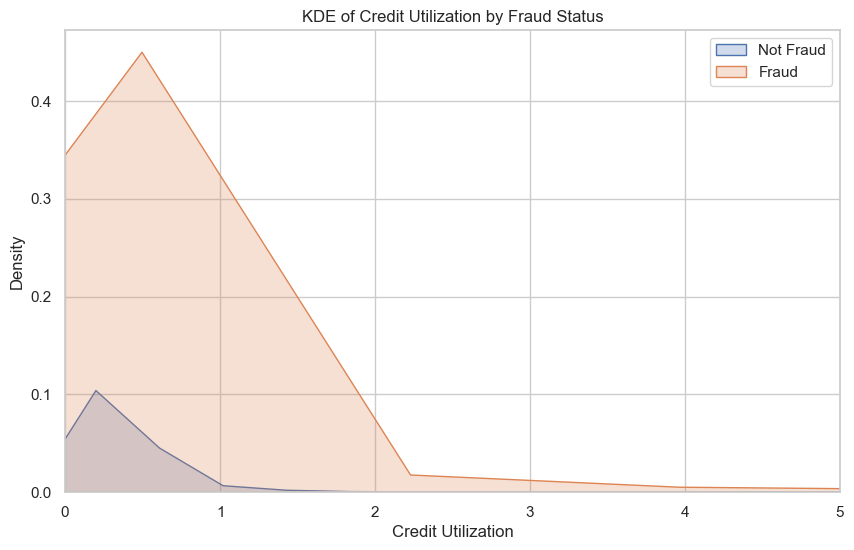

In [109]:
#5.KDE of Credit Utilization by Fraud Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=model_df[model_df['is_fraud'] == 0], x='credit_utilization', label='Not Fraud', fill=True)
sns.kdeplot(data=model_df[model_df['is_fraud'] == 1], x='credit_utilization', label='Fraud', fill=True)
plt.xlim(0, 5)  # Limit range to focus on main distribution
plt.title('KDE of Credit Utilization by Fraud Status')
plt.xlabel('Credit Utilization')
plt.ylabel('Density')
plt.legend()
plt.show()


C:\Users\prama\AppData\Local\Temp\ipykernel_14780\648417958.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=non_fraud_counts, x='transaction_type', y='fraud_count', palette='Reds')


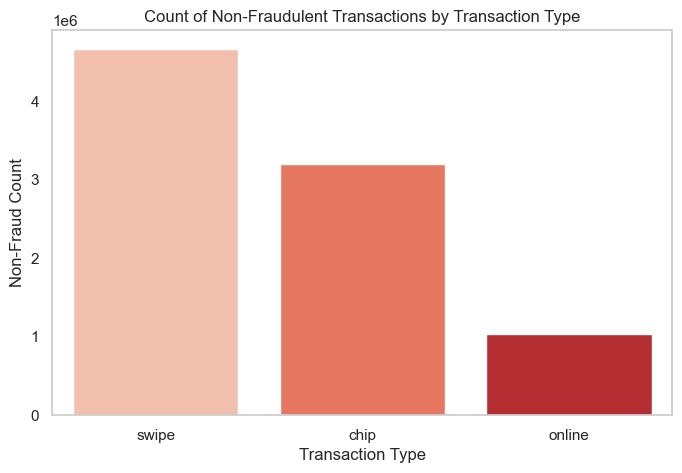

  transaction_type  fraud_count
0            swipe      4666835
1             chip      3199600
2           online      1035196


In [111]:
#6 Count of Non-Fraudulent Transactions by transaction type
non_fraud_only = model_df[model_df['is_fraud'] == 0]
non_fraud_counts = non_fraud_only['transaction_type'].value_counts().reset_index()
non_fraud_counts.columns = ['transaction_type', 'fraud_count']
plt.figure(figsize=(8,5))
sns.barplot(data=non_fraud_counts, x='transaction_type', y='fraud_count', palette='Reds')
plt.title('Count of Non-Fraudulent Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Non-Fraud Count')
plt.grid(axis='y')
plt.show()
print(non_fraud_counts)


C:\Users\prama\AppData\Local\Temp\ipykernel_14780\2698848141.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_counts, x='transaction_type', y='fraud_count', palette='Reds')


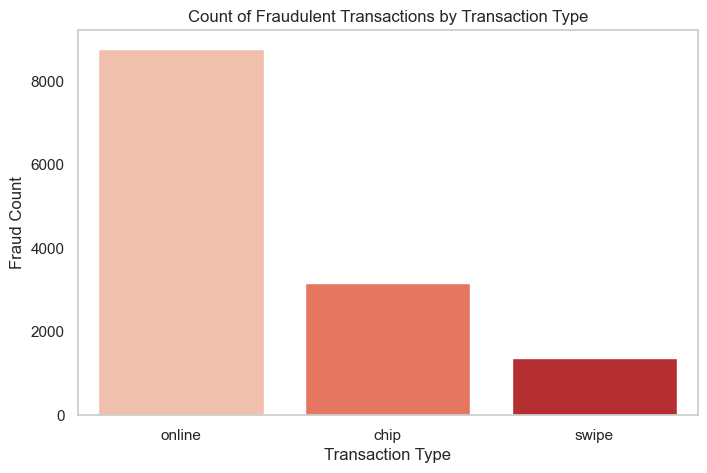

In [113]:
#Count of Fraudulent Transactions by Transaction Type
fraud_only = model_df[model_df['is_fraud'] == 1]
fraud_counts = fraud_only['transaction_type'].value_counts().reset_index()
fraud_counts.columns = ['transaction_type', 'fraud_count']
plt.figure(figsize=(8,5))
sns.barplot(data=fraud_counts, x='transaction_type', y='fraud_count', palette='Reds')
plt.title('Count of Fraudulent Transactions by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Count')
plt.grid(axis='y')
plt.show()

In [151]:
model_df.groupby('is_fraud')[error_cols].sum()

,error_insufficient_balance,error_bad_pin,error_technical_glitch,error_bad_card_number,error_bad_expiration,error_bad_cvv,error_bad_zipcode
is_fraud,,,,,,,
0.0,88002,21617,17981,5290,4127,4041,774
1.0,173,113,32,60,54,142,0


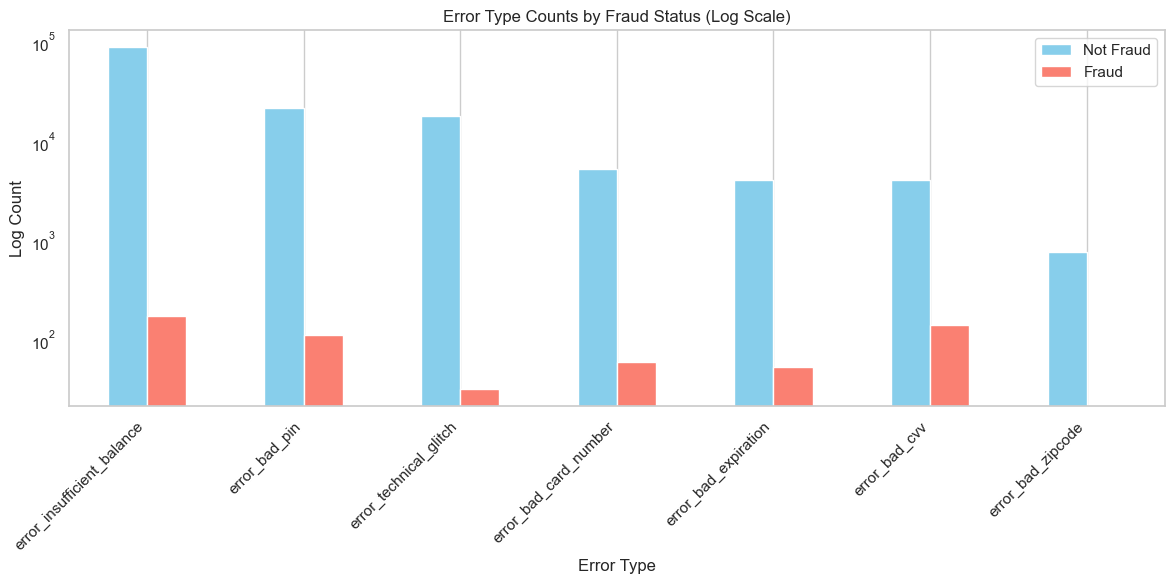

In [159]:
error_counts.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.yscale('log')  # Add log scale
plt.title("Error Type Counts by Fraud Status (Log Scale)")
plt.ylabel("Log Count")
plt.xlabel("Error Type")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\prama\AppData\Local\Temp\ipykernel_8752\1015357288.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fraud_count = model_df.groupby(['age_group', 'is_fraud']).size().reset_index(name='count')


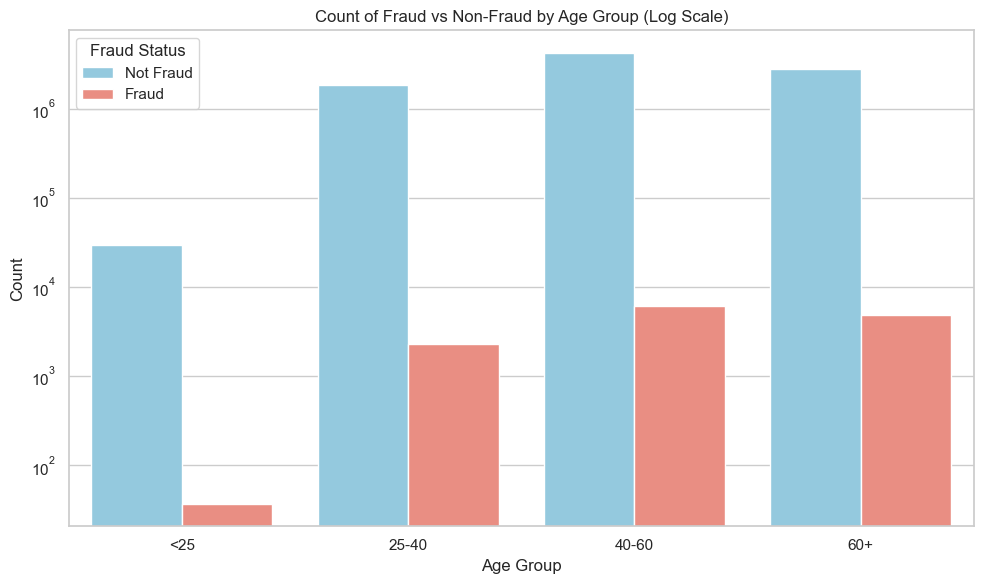

In [161]:
#Do older or younger users experience more fraud?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create age groups in the main dataframe
model_df['age_group'] = pd.cut(model_df['current_age'], 
                                bins=[0, 25, 40, 60, 100], 
                                labels=['<25', '25-40', '40-60', '60+'])

# Group by age group and fraud status
age_fraud_count = model_df.groupby(['age_group', 'is_fraud']).size().reset_index(name='count')

# Replace fraud label for readability
age_fraud_count['Fraud Status'] = age_fraud_count['is_fraud'].map({0: 'Not Fraud', 1: 'Fraud'})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=age_fraud_count, x='age_group', y='count', hue='Fraud Status', palette=['skyblue', 'salmon'])

plt.yscale('log')  # Optional: log scale to better visualize low counts
plt.title('Count of Fraud vs Non-Fraud by Age Group (Log Scale)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



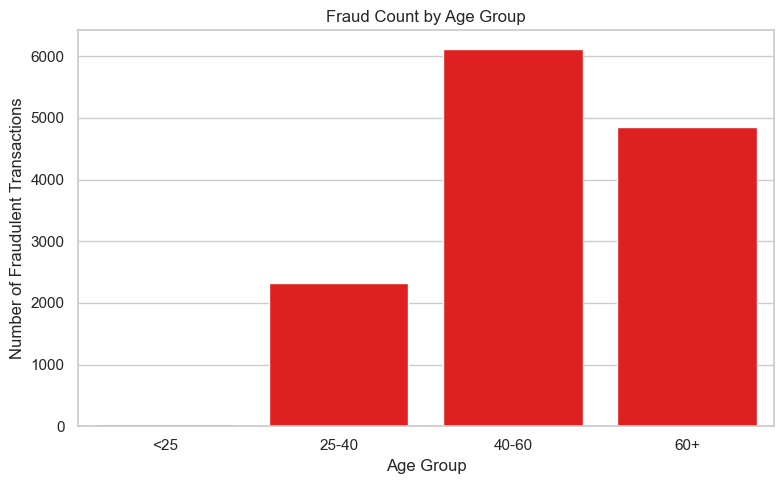

In [163]:
#Fraud Count by Age Group
fraud_only = model_df[model_df['is_fraud'] == 1]
fraud_by_age = fraud_only['age_group'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_by_age.index, y=fraud_by_age.values, color='red')

plt.title('Fraud Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Transactions')
plt.tight_layout()
plt.show()


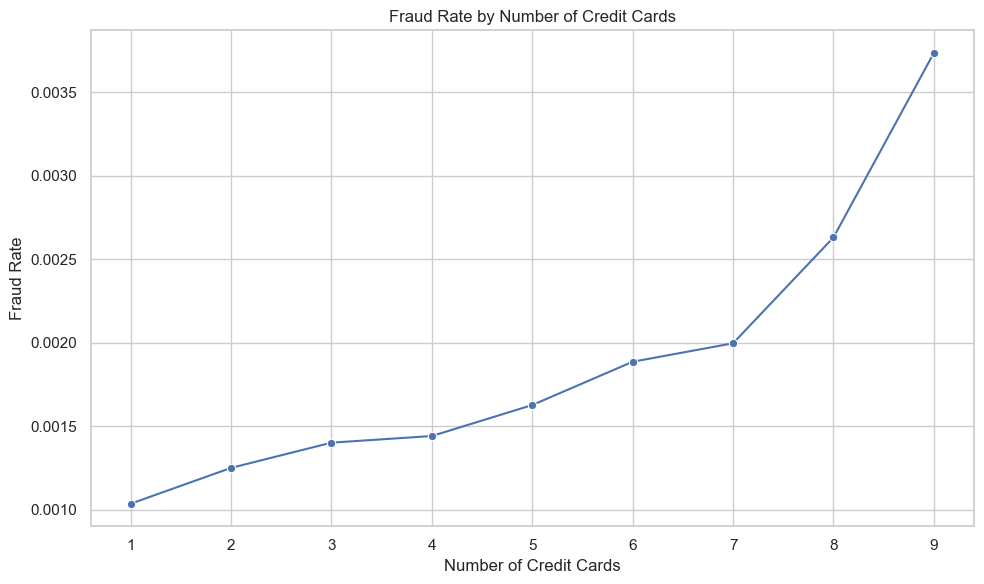

In [165]:
# How does the number of credit cards relate to fraud probability?
fraud_card_counts = model_df.groupby(['num_credit_cards', 'is_fraud']).size().unstack(fill_value=0)
fraud_card_counts['fraud_rate'] = fraud_card_counts[1] / (fraud_card_counts[0] + fraud_card_counts[1])
plt.figure(figsize=(10, 6))
sns.lineplot(data=fraud_card_counts, x=fraud_card_counts.index, y='fraud_rate', marker='o')
plt.title('Fraud Rate by Number of Credit Cards')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Fraud Rate')
plt.xticks(fraud_card_counts.index)
plt.grid(True)
plt.tight_layout()
plt.show()


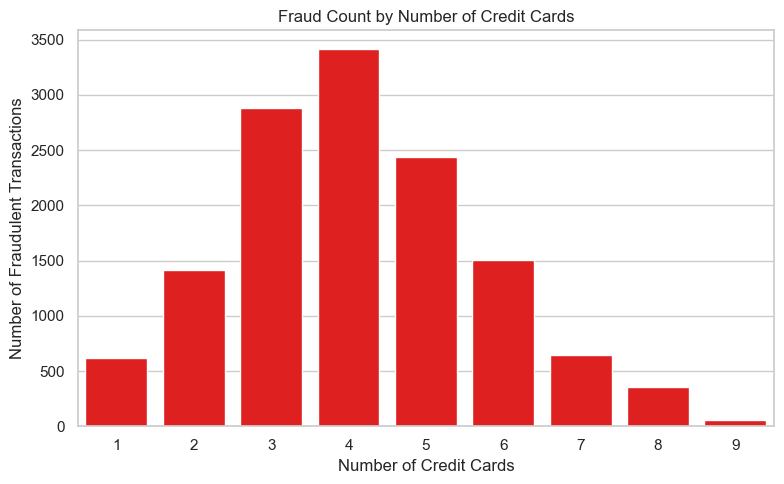

In [167]:
#Fraud Count By Number of Credit Card
fraud_only = model_df[model_df['is_fraud'] == 1]
fraud_card_count = fraud_only['num_credit_cards'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_card_count.index, y=fraud_card_count.values, color='red')
plt.title('Fraud Count by Number of Credit Cards')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Number of Fraudulent Transactions')
plt.tight_layout()
plt.show()


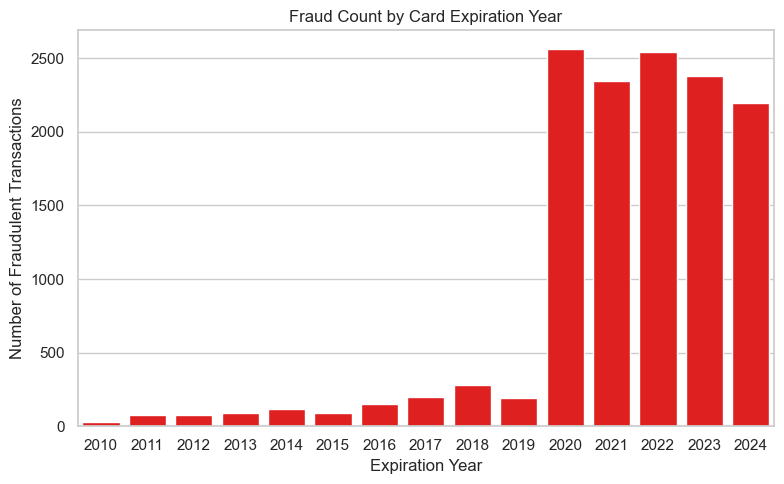

In [169]:
#Do users with expired or recently opened cards face more fraud?
#Part1
# Extract year from 'expires' column (assuming it's datetime already)
model_df['card_exp_year'] = model_df['expires'].dt.year

# Fraud count by expiration year
fraud_exp_year = model_df[model_df['is_fraud'] == 1]['card_exp_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_exp_year.index, y=fraud_exp_year.values, color='red')

plt.title('Fraud Count by Card Expiration Year')
plt.xlabel('Expiration Year')
plt.ylabel('Number of Fraudulent Transactions')
plt.tight_layout()
plt.show()


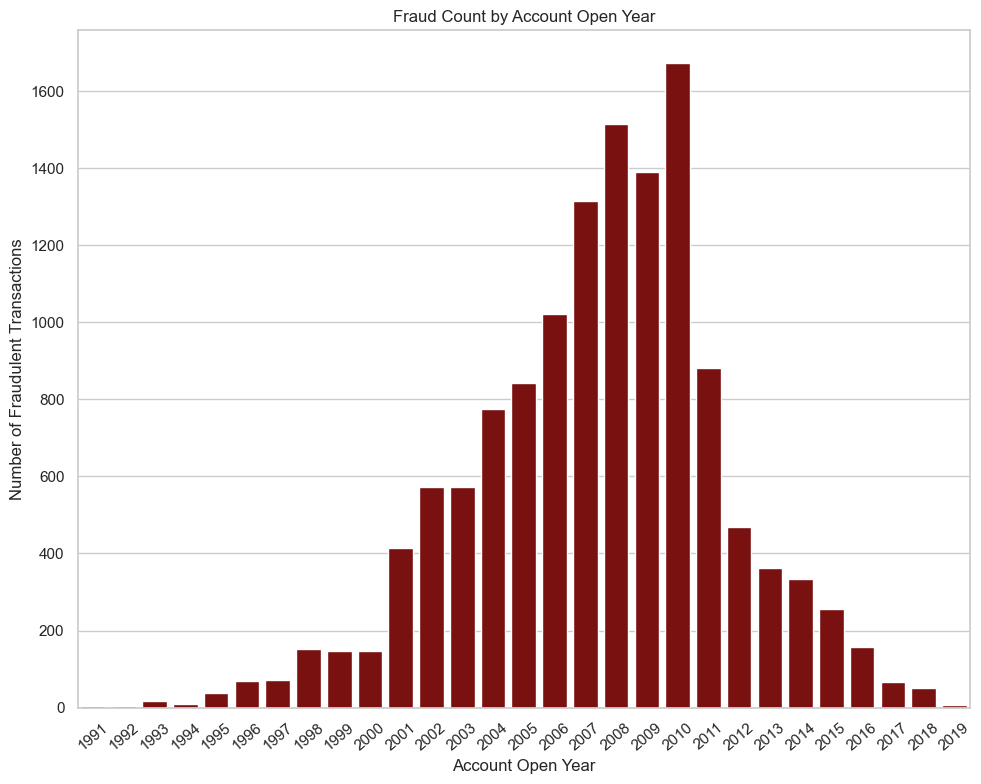

In [171]:
#Part2
model_df['acct_open_year'] = model_df['acct_open_date'].dt.year

fraud_open_year = model_df[model_df['is_fraud'] == 1]['acct_open_year'].value_counts().sort_index()
plt.figure(figsize=(10,8))
sns.barplot(x=fraud_open_year.index, y=fraud_open_year.values, color='darkred')

plt.title('Fraud Count by Account Open Year')
plt.xlabel('Account Open Year')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


C:\Users\prama\AppData\Local\Temp\ipykernel_8752\3249247180.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mcc_fraud_desc.values, y=top_mcc_fraud_desc.index, palette='Reds_r')


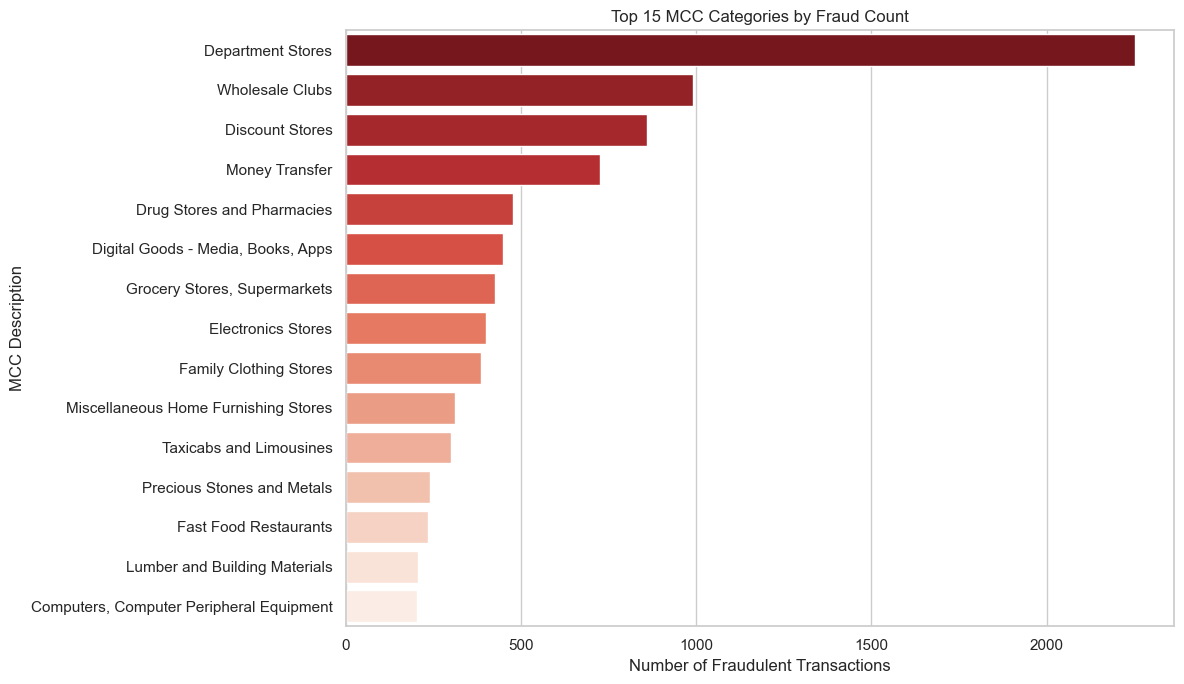

In [173]:
# What are the top MCC (Merchant Category Codes) associated with fraud?
# Make sure mcc_mapping is loaded correctly as a dictionary
with open("D:/Fraud Detection Data/mcc_codes.json", "r") as f:
    mcc_mapping = json.load(f)

# Get top MCCs for fraud
top_mcc_fraud = model_df[model_df['is_fraud'] == 1]['mcc'].value_counts().head(15)

# Map MCC codes to readable names using dictionary
top_mcc_fraud_desc = top_mcc_fraud.rename(index=lambda mcc: mcc_mapping.get(str(int(mcc)), f"MCC {mcc}"))
plt.figure(figsize=(12, 7))
sns.barplot(x=top_mcc_fraud_desc.values, y=top_mcc_fraud_desc.index, palette='Reds_r')

plt.title('Top 15 MCC Categories by Fraud Count')
plt.xlabel('Number of Fraudulent Transactions')
plt.ylabel('MCC Description')
plt.tight_layout()
plt.show()


In [175]:
#Feature Encoding
model_df.select_dtypes(include='object').columns.tolist()


['use_chip',
 'merchant_city',
 'mcc',
 'errors',
 'transaction_type',
 'mcc_description',
 'gender',
 'address']

In [177]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ['use_chip', 'transaction_type', 'gender', 'mcc_description']:
    model_df[col] = le.fit_transform(model_df[col].astype(str))

In [178]:
model_df[['use_chip', 'transaction_type', 'gender', 'mcc_description']].head()


,use_chip,transaction_type,gender,mcc_description
0,2,2,0,64
1,2,2,1,26
2,2,2,1,70
3,2,2,1,32
4,2,2,0,12


In [181]:
#Checking for Time-based validation
model_df['txn_year'] = model_df['date'].dt.year

In [183]:
model_df['txn_year'].value_counts().sort_index()

txn_year
2010    831529
2011    863428
2012    885421
2013    907304
2014    915073
2015    930224
2016    932762
2017    937284
2018    934599
2019    777339
Name: count, dtype: int64

In [185]:
#Modelling (Isolation Forest not using the is_fraud label)
train_df = model_df[model_df['txn_year']<=2016]
test_df = model_df[model_df['txn_year']>=2017]

In [187]:
x_train_iso = train_df.select_dtypes(include = 'number').drop(columns=['is_fraud'],errors='ignore')
x_test_iso = test_df.select_dtypes(include = 'number').drop(columns=['is_fraud'], errors='ingore')
y_test_iso = test_df['is_fraud']

In [189]:
#Check for NaNs, inf or crazy values
import numpy as np
print("NaNs in training set:")
print(x_train_iso.isna().sum())

# Check for infinite values
print("Any inf values?", np.isinf(x_train_iso).values.any())

NaNs in training set:
id                             0
client_id                      0
card_id                        0
amount                         0
use_chip                       0
merchant_id                    0
error_insufficient_balance     0
error_bad_pin                  0
error_technical_glitch         0
error_bad_card_number          0
error_bad_expiration           0
error_bad_cvv                  0
error_bad_zipcode              0
negative_transaction           0
transaction_type               0
mcc_description                0
id_user                        0
current_age                    0
retirement_age                 0
birth_year                     0
birth_month                    0
gender                         0
latitude                       0
longitude                      0
per_capita_income              0
yearly_income                  0
total_debt                     0
credit_score                   0
num_credit_cards               0
income_outlier       

In [191]:
x_train_iso = x_train_iso.replace([np.inf, -np.inf], np.nan)
x_train_iso = x_train_iso.fillna(0) 
x_test_iso = x_test_iso.replace([np.inf, -np.inf], np.nan)
x_test_iso = x_test_iso.fillna(0)

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_iso)
x_test_scaled=scaler.transform(x_test_iso)

In [195]:
from sklearn.ensemble import IsolationForest
isolation=IsolationForest(contamination=0.005,random_state=42)
isolation.fit(x_train_scaled)

IsolationForest(contamination=0.005, random_state=42)

In [197]:
#predict anomalies
y_pred_raw=isolation.predict(x_test_scaled)
y_pred=[1 if x == -1 else 0 for x in y_pred_raw]

In [199]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print('Confusion Matrix:')
print(confusion_matrix(y_test_iso, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_iso, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test_iso,y_pred))


Confusion Matrix:
[[2619696   26365]
 [   3131      30]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99   2646061
         1.0       0.00      0.01      0.00      3161

    accuracy                           0.99   2649222
   macro avg       0.50      0.50      0.50   2649222
weighted avg       1.00      0.99      0.99   2649222

ROC-AUC Score: 0.4997634002320663


In [185]:

                     #Predicted Not Fraud     #Predicted Fraud
#Actual Not Fraud     2617195(TN)                28866(FP)
#Actual Fraud         3127(FN)                   34(TP)

#Precision 0.0 beacause 34 out 28900 predicted frauds were actually fraud
#Recall 0.01 model could only catch 34 out of 3200
#F1 score 0.0 imbalance
#ROC-AUC ~0.50 it is just guessing randomly

In [219]:
# Find object or category columns and check unique values
x_train.select_dtypes(include=['object', 'category']).nunique().sort_values(ascending=False)


merchant_city    11159
address           1211
mcc                109
errors              23
age_group            4
dtype: int64

In [221]:
# Drop high-cardinality columns before encoding
cols_to_drop = ['merchant_city', 'address']
x_train.drop(columns=cols_to_drop, inplace=True, errors='ignore')
x_val.drop(columns=cols_to_drop, inplace=True, errors='ignore')
x_test.drop(columns=cols_to_drop, inplace=True, errors='ignore')


In [225]:
# Drop datetime columns before imputation
datetime_cols = x_train.select_dtypes(include=['datetime64[ns]']).columns.tolist()

x_train = x_train.drop(columns=datetime_cols)
x_val = x_val.drop(columns=datetime_cols)
x_test = x_test.drop(columns=datetime_cols)


In [229]:
# Encode categorical variables (like gender, transaction_type, etc.)
x_train = pd.get_dummies(x_train, drop_first=True)
x_val = pd.get_dummies(x_val, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

# Ensure all three datasets have the same columns after encoding
x_val = x_val.reindex(columns=x_train.columns, fill_value=0)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)




In [231]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

x_train_filled = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_val_filled = pd.DataFrame(imputer.transform(x_val), columns=x_val.columns)
x_test_filled = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)


In [233]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train_filled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

C:\Users\prama\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\prama\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\prama\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\prama\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\prama\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Before SMOTE: is_fraud
0.0    5325256
1.0       7723
Name: count, dtype: int64
After SMOTE: is_fraud
0.0    5325256
1.0    5325256
Name: count, dtype: int64


C:\Users\prama\AppData\Local\Temp\ipykernel_8752\3536959565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette='pastel')
C:\Users\prama\AppData\Local\Temp\ipykernel_8752\3536959565.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_sm, ax=axes[1], palette='muted')


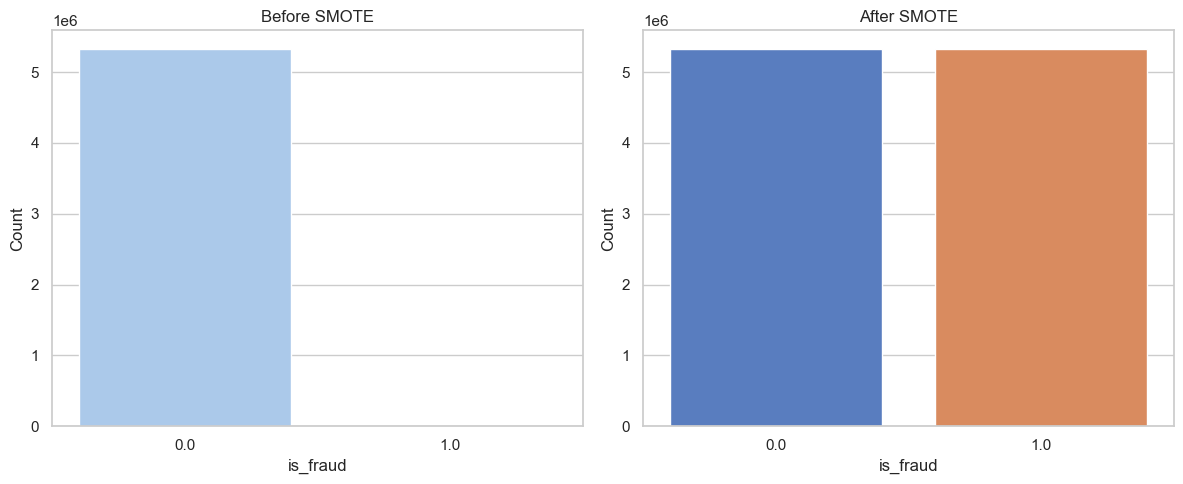

In [235]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_train, ax=axes[0], palette='pastel')
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("is_fraud")
axes[0].set_ylabel("Count")

sns.countplot(x=y_train_sm, ax=axes[1], palette='muted')
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("is_fraud")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [237]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,max_depth=15,n_jobs=-1, random_state=42)
rf.fit(x_train_sm, y_train_sm)

RandomForestClassifier(max_depth=15, n_jobs=-1, random_state=42)

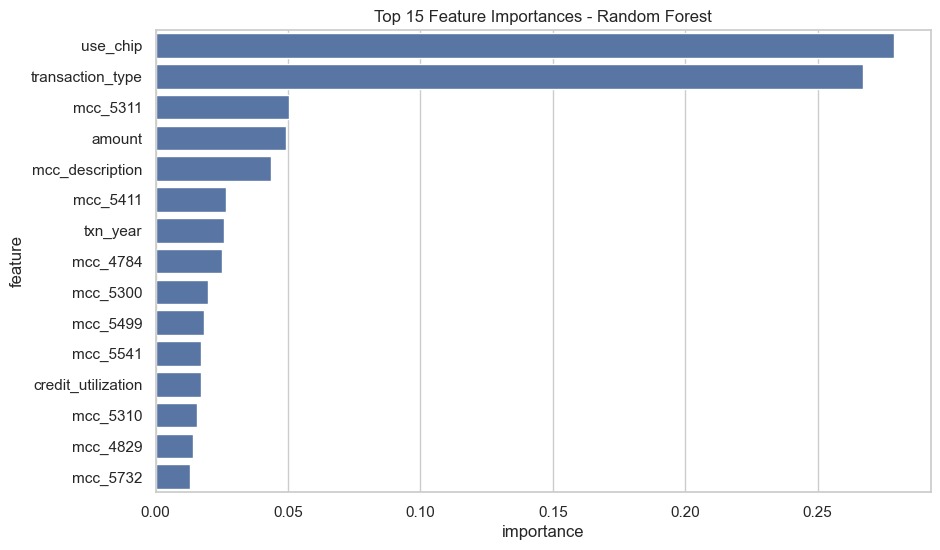

In [239]:
importances = rf.feature_importances_
feature_names = x_train.columns
feat_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_df = feat_df.sort_values(by='importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_df, x='importance', y='feature')
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()

In [241]:
# Ensure validation features match training columns (both names and order)
x_val = x_val[x_train_sm.columns]


In [243]:
# Drop duplicated column names
x_val = x_val.loc[:, ~x_val.columns.duplicated()]


In [245]:
# Keep only matching columns in the correct order
x_val_fixed = x_val.reindex(columns=x_train_sm.columns, fill_value=0)


In [247]:
print("Matching columns?", list(x_val.columns) == list(x_train_sm.columns))


Matching columns? True


In [249]:
y_val_pred = rf.predict(x_val_fixed)
print("ROC-AUC:", roc_auc_score(y_val, rf.predict_proba(x_val_fixed)[:, 1]))


ROC-AUC: 0.9265394607377395


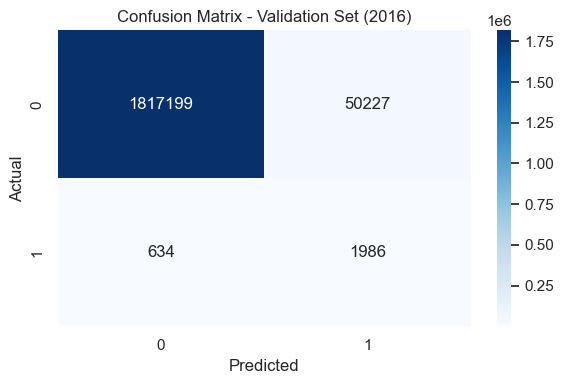

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99   1867426
         1.0       0.04      0.76      0.07      2620

    accuracy                           0.97   1870046
   macro avg       0.52      0.87      0.53   1870046
weighted avg       1.00      0.97      0.98   1870046



In [251]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Validation Set (2016)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Classification Report
print(classification_report(y_val, y_val_pred))


In [253]:
# Drop duplicates if any
x_test = x_test.loc[:, ~x_test.columns.duplicated()]

# Align columns with training (both order and names)
x_test_fixed = x_test.reindex(columns=x_train_sm.columns, fill_value=0)

# Check if they now match
print("Matching test columns?", list(x_test_fixed.columns) == list(x_train_sm.columns))


Matching test columns? True


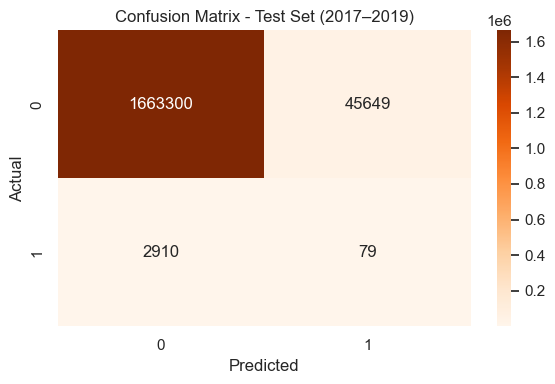

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99   1708949
         1.0       0.00      0.03      0.00      2989

    accuracy                           0.97   1711938
   macro avg       0.50      0.50      0.49   1711938
weighted avg       1.00      0.97      0.98   1711938

Test ROC-AUC (2017–2019): 0.6984814199380905


In [255]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
y_test_pred = rf.predict(x_test_fixed)

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Test Set (2017–2019)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Report & ROC-AUC
print(classification_report(y_test, y_test_pred))
print("Test ROC-AUC (2017–2019):", roc_auc_score(y_test, rf.predict_proba(x_test_fixed)[:, 1]))


In [257]:
#Hyprparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [259]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [261]:
rf_base = RandomForestClassifier(random_state=42)


In [263]:
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid,
    n_iter=10,                
    cv=3,                     
    verbose=2,
    random_state=42,
    n_jobs=-1                 
)
#random_search = RandomizedSearchCV(
#    rf,
#   param_distributions,
#    n_iter=5,  # ↓ from 10 or more to 5
#   cv=3,
#   scoring='roc_auc',
#    n_jobs=-1,
#    random_state=42,
#    verbose=1
#)

In [265]:
x_sample = x_train_sm.sample(frac=0.1, random_state=42)
y_sample = y_train_sm.loc[x_sample.index]

random_search.fit(x_sample, y_sample)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [267]:
print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [271]:
from sklearn.ensemble import RandomForestClassifier

best_params = {
    'n_estimators': 50,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_depth': 10,
    'bootstrap': False
}

final_rf = RandomForestClassifier(**best_params, random_state=42,n_jobs=-1)
final_rf.fit(x_train_sm, y_train_sm)

KeyboardInterrupt: 

Validation (2016) - Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    930314
         1.0       0.33      0.00      0.00      2448

    accuracy                           1.00    932762
   macro avg       0.67      0.50      0.50    932762
weighted avg       1.00      1.00      1.00    932762

ROC-AUC Score: 0.6396559352347982


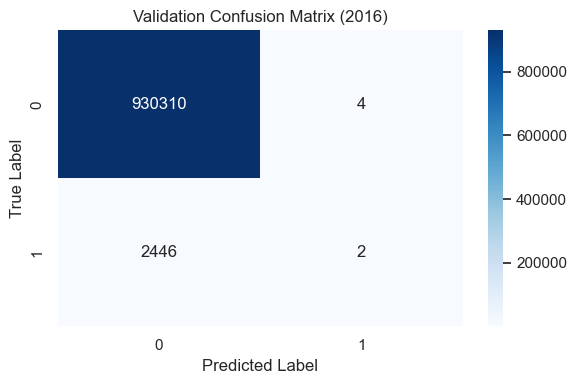

In [319]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
x_val_fixed = x_val[x_train_sm.columns]
y_val_pred = final_rf.predict(x_val_fixed)
print("Validation (2016) - Classification Report")
print(classification_report(y_val, y_val_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, final_rf.predict_proba(x_val_fixed)[:, 1]))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Validation Confusion Matrix (2016)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



Test (2017–2019) - Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   2646061
         1.0       0.00      0.00      0.00      3161

    accuracy                           1.00   2649222
   macro avg       0.50      0.50      0.50   2649222
weighted avg       1.00      1.00      1.00   2649222

ROC-AUC Score: 0.5810991833786778


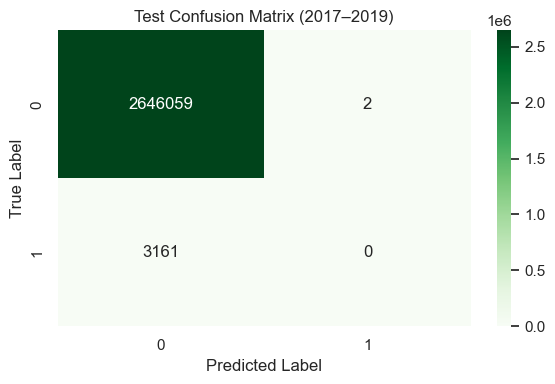

In [321]:
x_test_fixed = x_test[x_train_sm.columns]
y_test_pred = final_rf.predict(x_test_fixed)
print("\nTest (2017–2019) - Classification Report")
print(classification_report(y_test, y_test_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, final_rf.predict_proba(x_test_fixed)[:, 1]))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Test Confusion Matrix (2017–2019)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [323]:
# Get predicted probabilities for the positive class (fraud)
y_val_probs = final_rf.predict_proba(x_val_fixed)[:, 1]


In [325]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

thresholds = np.arange(0.0, 1.05, 0.05)
precisions = []
recalls = []
f1s = []

for thresh in thresholds:
    y_pred_thresh = (y_val_probs >= thresh).astype(int)
    precisions.append(precision_score(y_val, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_val, y_pred_thresh, zero_division=0))
    f1s.append(f1_score(y_val, y_pred_thresh, zero_division=0))

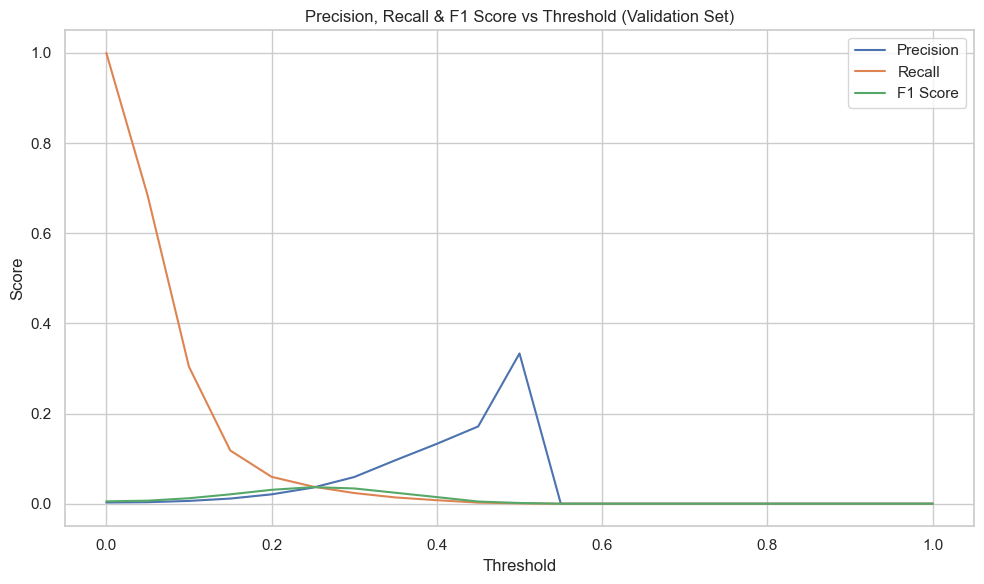

In [327]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall & F1 Score vs Threshold (Validation Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [329]:
chosen_thresh = 0.3  # example threshold
y_val_final = (y_val_probs >= chosen_thresh).astype(int)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print("Confusion Matrix at threshold =", chosen_thresh)
print(confusion_matrix(y_val, y_val_final))
print("\nClassification Report:")
print(classification_report(y_val, y_val_final))
print("ROC-AUC Score:", roc_auc_score(y_val, y_val_probs))

Confusion Matrix at threshold = 0.3
[[929363    951]
 [  2390     58]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    930314
         1.0       0.06      0.02      0.03      2448

    accuracy                           1.00    932762
   macro avg       0.53      0.51      0.52    932762
weighted avg       0.99      1.00      1.00    932762

ROC-AUC Score: 0.6396499758300735


In [273]:
!pip install xgboost


In [275]:
x_train_sm.dtypes.value_counts()

float64    168
Name: count, dtype: int64

In [277]:
non_numeric = x_train_sm.select_dtypes(exclude=[np.number])
print("Non-numeric columns:\n", non_numeric.columns.tolist())

Non-numeric columns:
 []


In [279]:
x_train_sm_cleaned = x_train_sm.loc[:, ~x_train_sm.columns.duplicated()].copy()

MemoryError: Unable to allocate 13.3 GiB for an array with shape (168, 10650512) and data type float64

In [282]:
import numpy as np

x_train_sm = x_train_sm.replace([np.inf, -np.inf], np.nan).dropna()
x_train_sm = x_train_sm.astype(np.float32)

# Sync target variable
y_train_sm_cleaned = y_train_sm.loc[x_train_sm_cleaned.index]

NameError: name 'x_train_sm_cleaned' is not defined

In [284]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(x_train_sm, y_train_sm)

C:\Users\prama\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:46:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [288]:
x_val_fixed = x_val.loc[:, x_train_sm.columns].copy()
x_val_fixed = x_val_fixed.replace([np.inf, -np.inf], np.nan).dropna()
x_val_fixed = x_val_fixed.astype(np.float32)

In [290]:
y_val_aligned = y_val.loc[x_val_fixed.index]


In [292]:
y_val_pred = xgb_model.predict(x_val_fixed)
y_val_proba = xgb_model.predict_proba(x_val_fixed)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("Confusion Matrix:")
print(confusion_matrix(y_val_aligned, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val_aligned, y_val_pred))
print("ROC-AUC Score:", roc_auc_score(y_val_aligned, y_val_proba))


Confusion Matrix:
[[1835087   24384]
 [    705    1905]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99   1859471
         1.0       0.07      0.73      0.13      2610

    accuracy                           0.99   1862081
   macro avg       0.54      0.86      0.56   1862081
weighted avg       1.00      0.99      0.99   1862081

ROC-AUC Score: 0.9410816111460665


In [294]:
x_test_cleaned = x_test.reindex(columns=x_train_sm.columns, fill_value=0)
x_test_cleaned = x_test_cleaned.replace([np.inf, -np.inf], np.nan).dropna()
x_test_cleaned = x_test_cleaned.astype('float32')

In [296]:
y_test_cleaned = y_test.loc[x_test_cleaned.index]

In [298]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict
y_test_pred = xgb_model.predict(x_test_cleaned)
y_test_proba = xgb_model.predict_proba(x_test_cleaned)[:, 1]

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test_cleaned, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test_cleaned, y_test_pred))

print("ROC-AUC Score:", roc_auc_score(y_test_cleaned, y_test_proba))

Confusion Matrix:
[[1679171   22304]
 [   2899      77]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99   1701475
         1.0       0.00      0.03      0.01      2976

    accuracy                           0.99   1704451
   macro avg       0.50      0.51      0.50   1704451
weighted avg       1.00      0.99      0.99   1704451

ROC-AUC Score: 0.679331023292251


In [395]:
#Treshold Tuning

In [300]:
# Get predicted probabilities
y_test_proba = xgb_model.predict_proba(x_test_cleaned)[:, 1]


In [302]:
print("x_test_cleaned shape:", x_test_cleaned.shape)
print("y_test shape:", y_test.shape)


x_test_cleaned shape: (1704451, 168)
y_test shape: (1711938,)


In [304]:
y_test_aligned = y_test.loc[x_test_cleaned.index]

In [306]:
print("x_test_cleaned:", x_test_cleaned.shape)
print("y_test_aligned:", y_test_aligned.shape)

x_test_cleaned: (1704451, 168)
y_test_aligned: (1704451,)


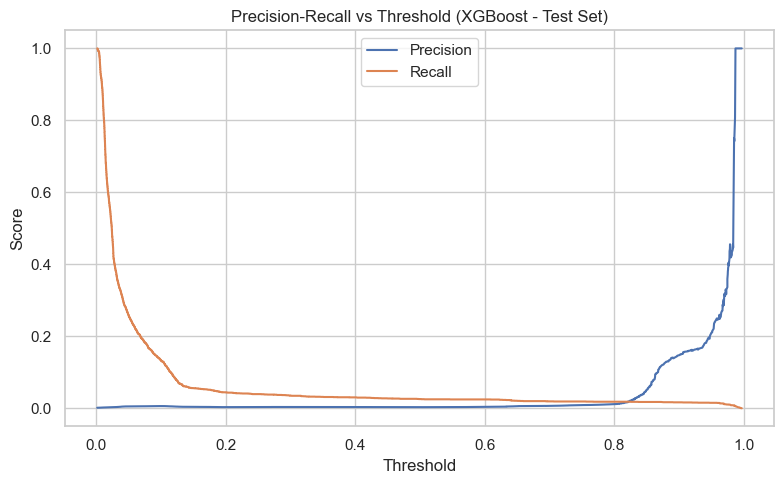

In [308]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Generate precision-recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test_aligned, y_test_proba)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold (XGBoost - Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [310]:
custom_threshold = 0.5  # you can experiment with values from 0.1 to 0.5
y_test_pred_custom = (y_test_proba >= custom_threshold).astype(int)

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test_aligned, y_test_pred_custom))

print("\nClassification Report:")
print(classification_report(y_test_aligned, y_test_pred_custom))

print("ROC-AUC Score:", roc_auc_score(y_test_aligned, y_test_proba))


Confusion Matrix:
[[1679171   22304]
 [   2899      77]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99   1701475
         1.0       0.00      0.03      0.01      2976

    accuracy                           0.99   1704451
   macro avg       0.50      0.51      0.50   1704451
weighted avg       1.00      0.99      0.99   1704451

ROC-AUC Score: 0.679331023292251


In [413]:
#Logistic Regression

In [312]:
from sklearn.linear_model import LogisticRegression

In [314]:
logreg = LogisticRegression(
    solver='liblinear', 
    random_state=42,
    max_iter=1000
)

In [318]:
logreg.fit(x_train_sm, y_train_sm)

MemoryError: Unable to allocate 13.3 GiB for an array with shape (168, 10650512) and data type float64

In [433]:
from sklearn.impute import SimpleImputer

# Create and apply imputer to validation data
imputer = SimpleImputer(strategy='mean')  # or 'median' or most_frequent
x_val_imputed = imputer.fit_transform(x_val_cleaned)

In [435]:
y_val_pred = logreg.predict(x_val_imputed)
y_val_proba = logreg.predict_proba(x_val_imputed)[:, 1]

C:\Users\prama\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\prama\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [439]:
from sklearn.impute import SimpleImputer

# Reuse the imputer (or create a new one if needed)
imputer = SimpleImputer(strategy='mean')
x_test_imputed = imputer.fit_transform(x_test_cleaned)

# Now predict
y_test_pred = logreg.predict(x_test_imputed)
y_test_proba = logreg.predict_proba(x_test_imputed)[:, 1]


C:\Users\prama\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\prama\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [441]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

print("ROC-AUC Score:", roc_auc_score(y_val, y_val_proba))


Confusion Matrix:
[[714152 216162]
 [  1046   1402]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87    930314
         1.0       0.01      0.57      0.01      2448

    accuracy                           0.77    932762
   macro avg       0.50      0.67      0.44    932762
weighted avg       1.00      0.77      0.87    932762

ROC-AUC Score: 0.7108987156785536


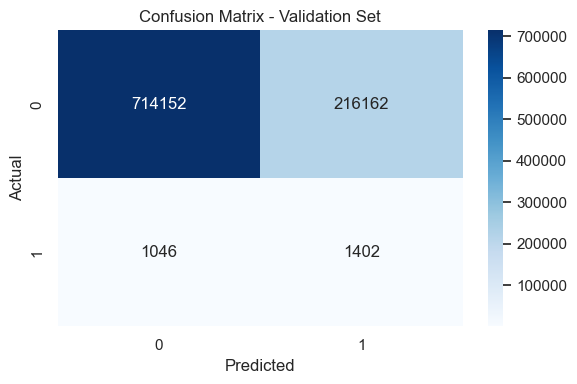

In [443]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [445]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("ROC-AUC Score (Test):", roc_auc_score(y_test, y_test_proba))


Confusion Matrix (Test):
[[2064844  581217]
 [   1956    1205]]

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       1.00      0.78      0.88   2646061
         1.0       0.00      0.38      0.00      3161

    accuracy                           0.78   2649222
   macro avg       0.50      0.58      0.44   2649222
weighted avg       1.00      0.78      0.88   2649222

ROC-AUC Score (Test): 0.6096249441366548


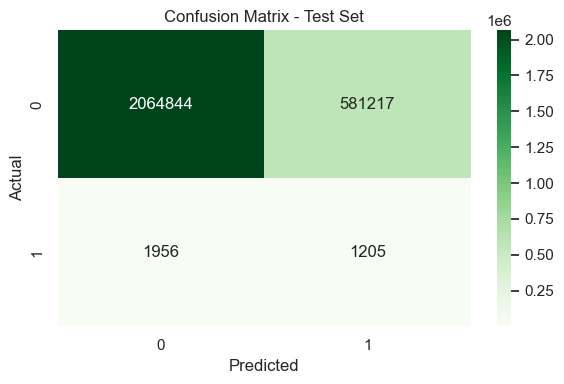

In [447]:
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

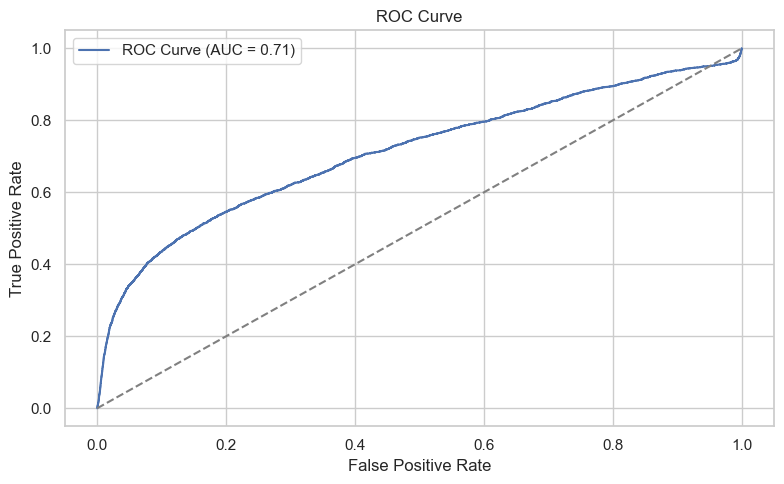

In [449]:
#ROC Curve (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


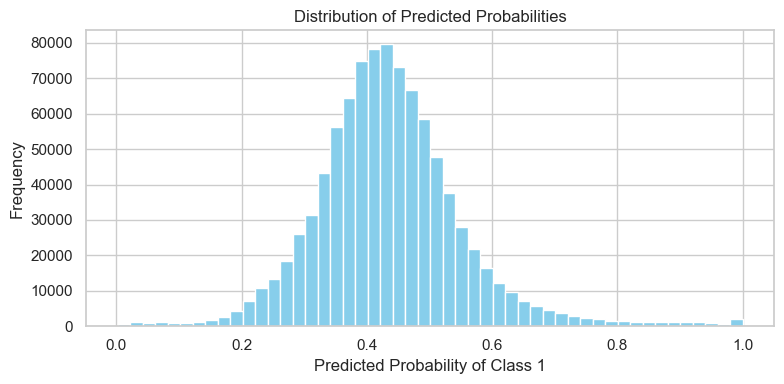

In [451]:
#Histogram of Predicted Probabilities
plt.figure(figsize=(8, 4))
plt.hist(y_val_proba, bins=50, color='skyblue')
plt.xlabel("Predicted Probability of Class 1")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.tight_layout()
plt.show()

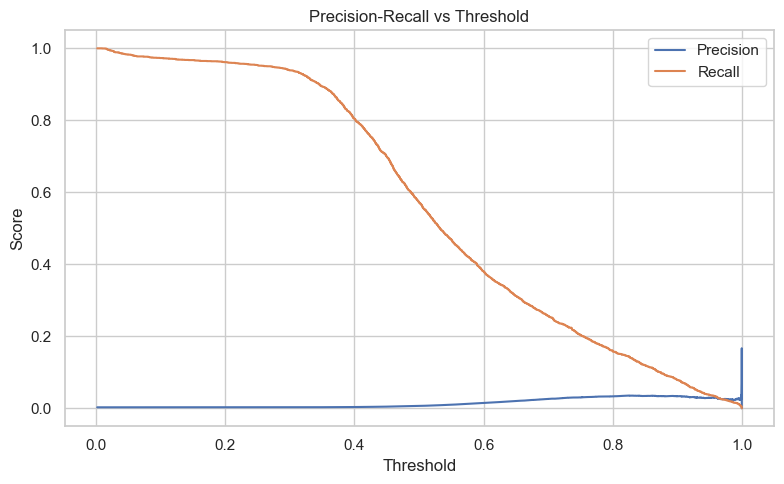

In [453]:
#Precision-Recall vs Threshold Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()